# Python for data analysis - Daniel COPIN

# Visualisation de la data


# Import des Data

In [257]:
chemin = "/Users/dani/Desktop/données_totales.csv"

In [327]:
import pandas as pd
dataf = pd.read_csv(chemin, delimiter = ',') #CSV avec pour délimiteur la virgule

In [328]:
# Supression première colonne 
dataf = dataf.drop(dataf.columns[0], axis=1)
dataf.head(10)

,Subject,Activity,ChestAccChannel1,ChestAccChannel2,ChestAccChannel3,ChestECG,ChestResp,WristAccChannel1,WristAccChannel2,WristAccChannel3,WristBVP,WristEDA,WristTemp,Label,Age,Gender,Height,Skin,Sport,Weight
0,S2,0.0,0.9162,0.0312,-0.0392,0.071228,4.338074,-0.375000,1.062500,0.390625,-80.38,0.267766,31.67,70.922966,28,m,189.0,3,5,80.0
1,S2,0.0,0.9130,0.0324,0.0478,0.113983,-2.784729,-0.562500,0.046875,0.843750,-80.38,0.262641,31.67,70.922966,28,m,189.0,3,5,80.0
2,S2,0.0,0.9138,0.0362,0.0558,-0.137283,-2.552795,-0.562500,0.046875,0.843750,-80.38,0.261360,31.67,70.922966,28,m,189.0,3,5,80.0
3,S2,0.0,0.9080,0.0166,0.0850,-0.063126,-2.798462,-0.578125,0.046875,0.828125,-80.38,0.260079,31.67,70.922966,28,m,189.0,3,5,80.0
4,S2,0.0,0.9146,0.0366,0.0846,1.487228,-4.518127,-0.578125,0.046875,0.828125,-80.38,0.261360,31.69,70.922966,28,m,189.0,3,5,80.0
5,S2,0.0,0.8998,0.0434,0.0634,0.340530,-6.361389,-0.562500,0.046875,0.843750,-80.38,0.262641,31.69,70.922966,28,m,189.0,3,5,80.0
6,S2,0.0,0.9080,0.0498,0.0554,-0.137787,-5.438232,-0.578125,0.046875,0.828125,-80.38,0.261360,31.69,70.922966,28,m,189.0,3,5,80.0
7,S2,0.0,0.9118,0.0514,0.0670,0.147446,-1.799011,-0.562500,0.046875,0.843750,-80.38,0.266485,31.69,70.922966,28,m,189.0,3,5,80.0
8,S2,0.0,0.8750,0.0696,0.0598,-0.052505,2.064514,-0.578125,0.046875,0.843750,-80.38,0.261360,31.67,71.291055,28,m,189.0,3,5,80.0
9,S2,0.0,0.9118,0.0526,0.0460,-0.311691,4.551697,-0.562500,0.062500,0.843750,-80.38,0.261360,31.67,71.291055,28,m,189.0,3,5,80.0


In [329]:
dataf.shape

(515632, 20)

## Import des librairies pour les graphes

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from pylab import * #On importe toutes les librairies

# Visualisation de la donnée sous différentes formes pour la comprendre

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a515ef150>,
      dtype=object)

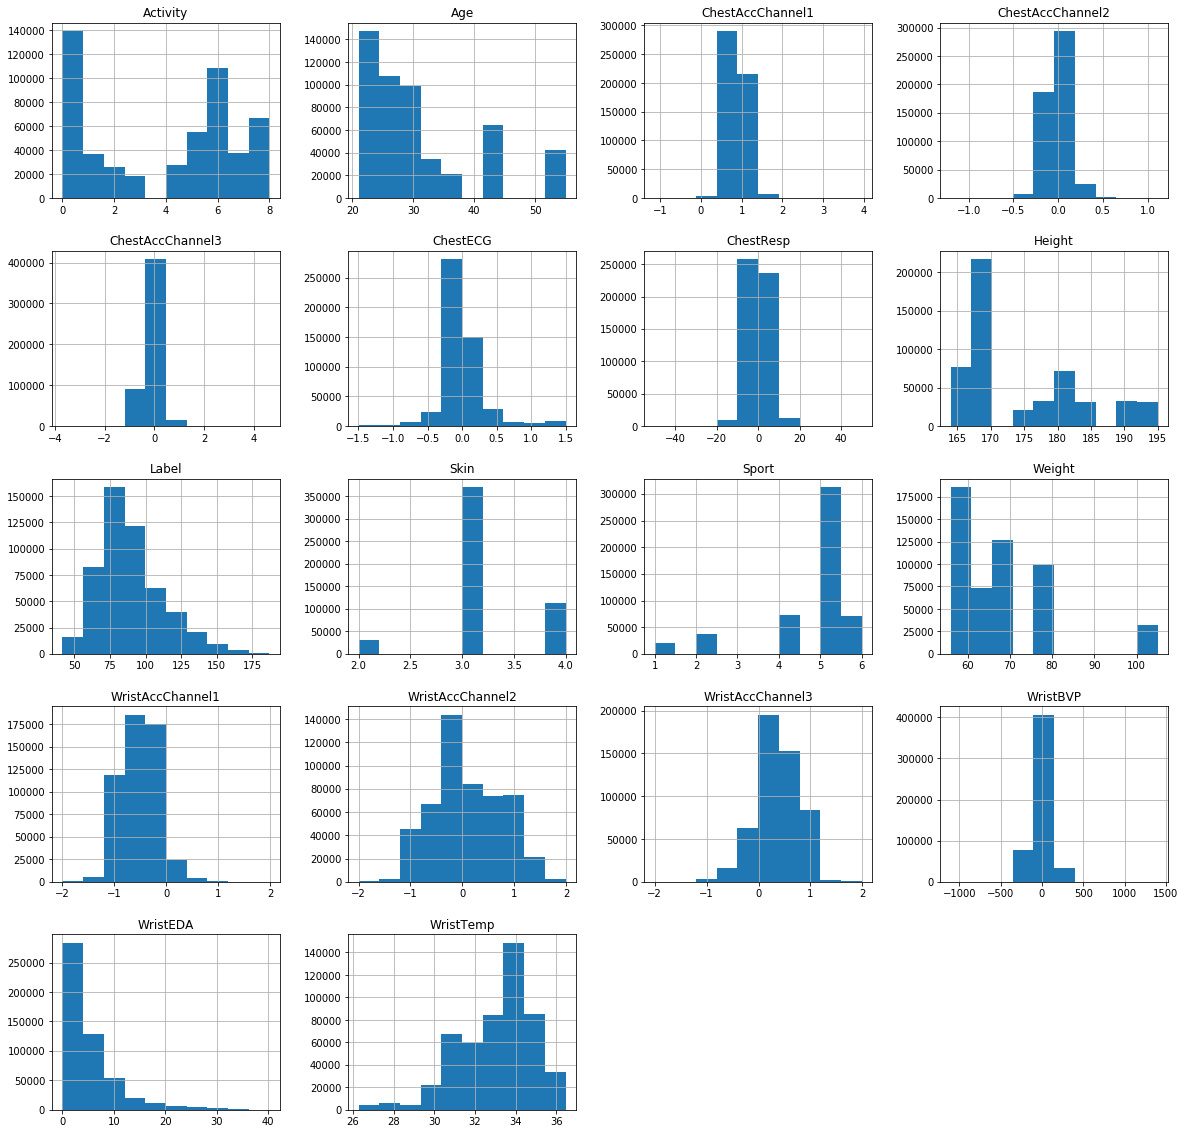

In [262]:
dataf.hist(bins=10, figsize=(20, 20))

## Sujet en fonction de l'age

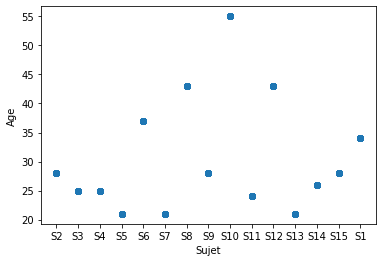

In [263]:
plt.scatter(dataf["Subject"], dataf["Age"])
plt.ylabel('Age')
plt.xlabel("Sujet")
plt.show()

## Poid

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ae53c90>]],
      dtype=object)

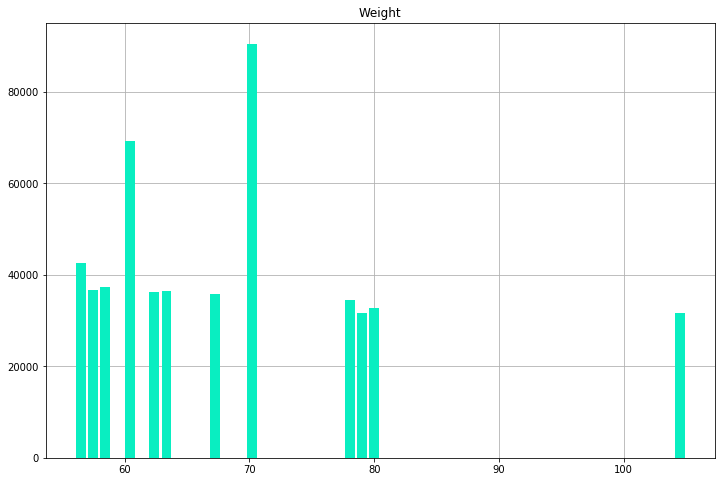

In [310]:
dataf.hist(column='Weight', bins=50, grid=True, figsize=(12,8), color='#09EEC1', zorder=2, rwidth=0.8)

## Taille

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a43f3e3d0>]],
      dtype=object)

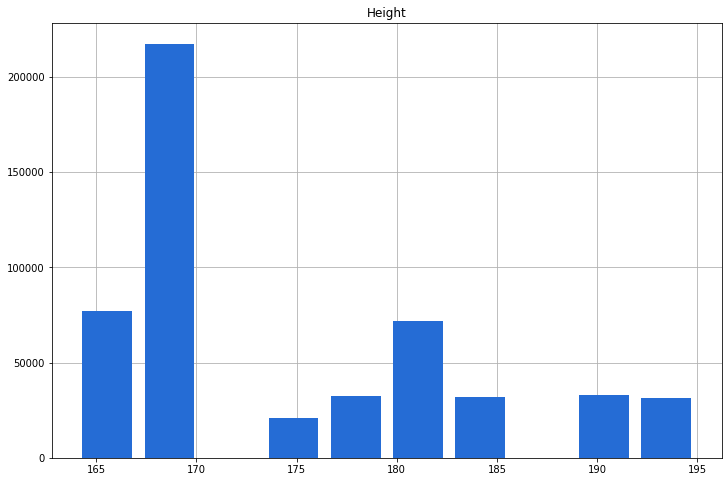

In [314]:
dataf.hist(column='Height', bins=10, grid=True, figsize=(12,8), color='#256CD5', zorder=2, rwidth=0.8)

## Activité

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e630910>]],
      dtype=object)

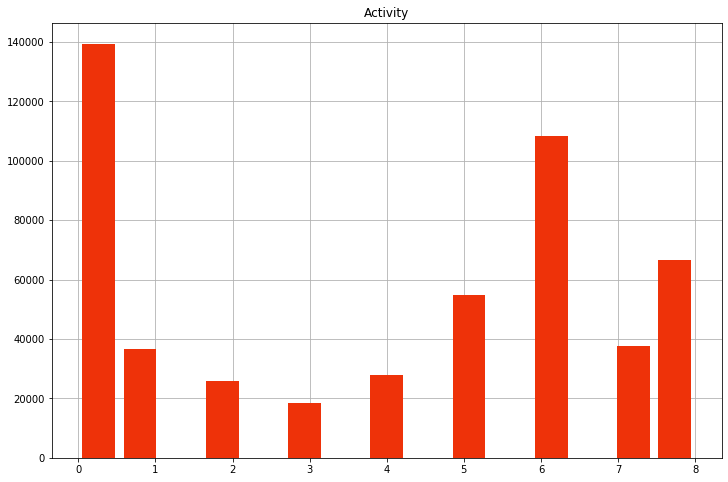

In [265]:
dataf.hist(column='Activity', bins=15, grid=True, figsize=(12,8), color='#EE3209', zorder=2, rwidth=0.8)

## WristTemp

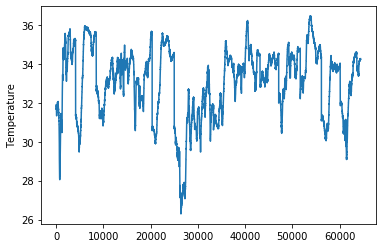

In [266]:
temp=[]
index=[]
for i in range(len(dataf['WristTemp'])):
    if i%8==0:
        temp.append(dataf['WristTemp'].iloc[i])
        index.append(i/8)
plt.plot(index,temp)
plt.ylabel('Temperature')
plt.show()

## WristBVP

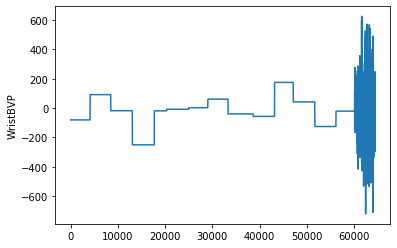

In [267]:
bvp=[]
index=[]
for i in range(len(dataf['WristBVP'])):
    if i%8==0:
        bvp.append(dataf['WristBVP'].iloc[i])
        index.append(i/8)
plt.plot(index,bvp)
plt.ylabel('WristBVP')
plt.show()

## WristEDA en fonction de l'activité

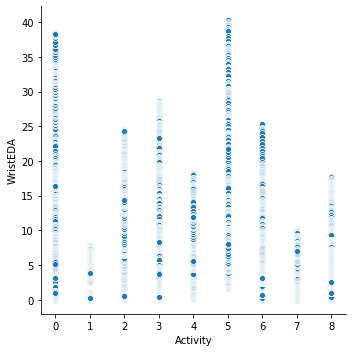

In [268]:
sn.relplot(x="Activity", y="WristEDA", data=dataf);

## Sujet en fonction de l'activité

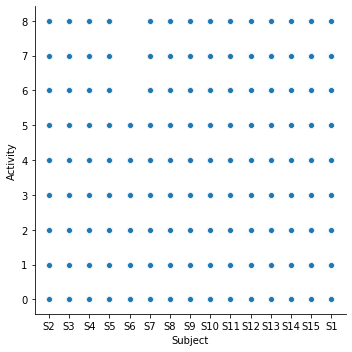

In [269]:
sn.relplot(x="Subject", y="Activity", data=dataf);

## Indices cardiaques en fonction l'activité du sujet (ici 3)


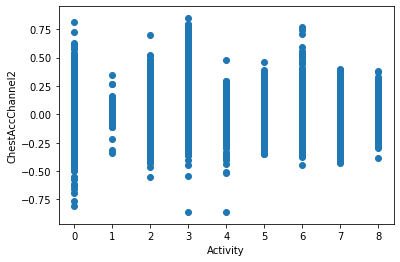

In [270]:
# On test ici pour le sujet 3 l'impact de l'indice cardiaque sur l'activité
# (Idem pour channel 1 et 3)
plt.scatter(dataf['Activity'].loc[dataf["Subject"] == "S3"], dataf['ChestAccChannel2'].loc[dataf["Subject"] == "S3"])
plt.xlabel('Activity')
plt.ylabel("ChestAccChannel2")
plt.show()

## Moyenne des indices cardiaques du sujet (ici 8)

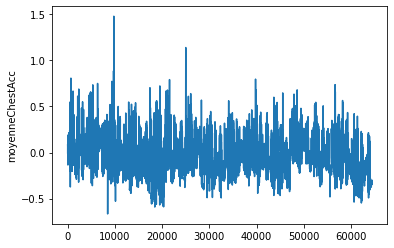

In [271]:
# Pour le Sujet 1, on analyse ChestAccChannels, les 3 en moyenne
recup_chest = dataf.loc[: , "ChestAccChannel2":"ChestAccChannel3"]
dataf["moyenneChestAcc"] = recup_chest.mean(axis=1)
moyenne=[]
index=[]
for i in range(len(dataf['moyenneChestAcc'])):
    if i%8==0:
        moyenne.append(dataf['moyenneChestAcc'].iloc[i])
        index.append(i/8)
plt.plot(index,moyenne)
plt.ylabel('moyenneChestAcc')
plt.show()

On constate donc que le chestAcc a peu d'influence

## Matrice de correlation entre les différentes données 

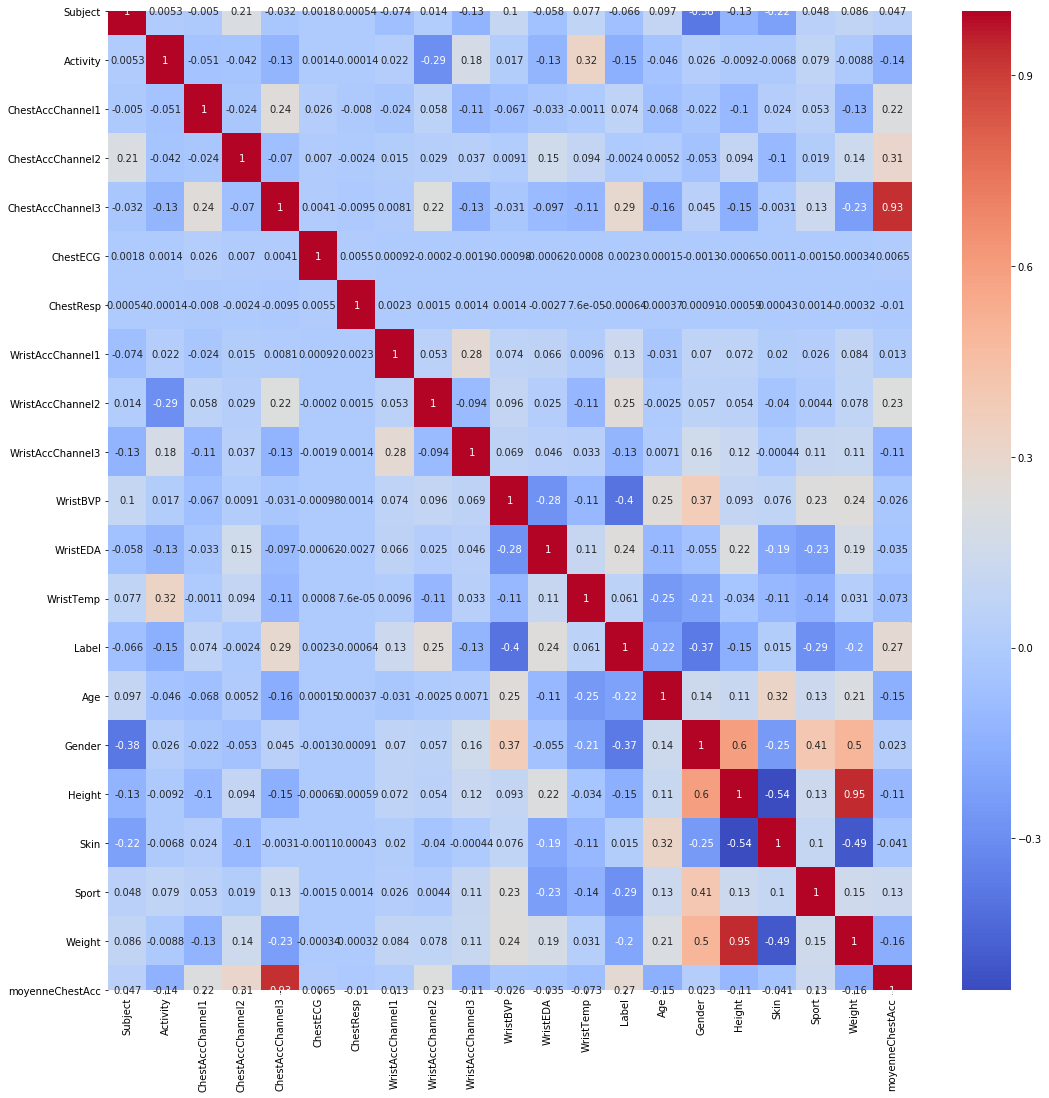

In [297]:
fig, ax = plt.subplots(figsize=(18,18))   
sn.heatmap(dataf.corr(), annot=True, ax=ax, cmap= 'coolwarm')

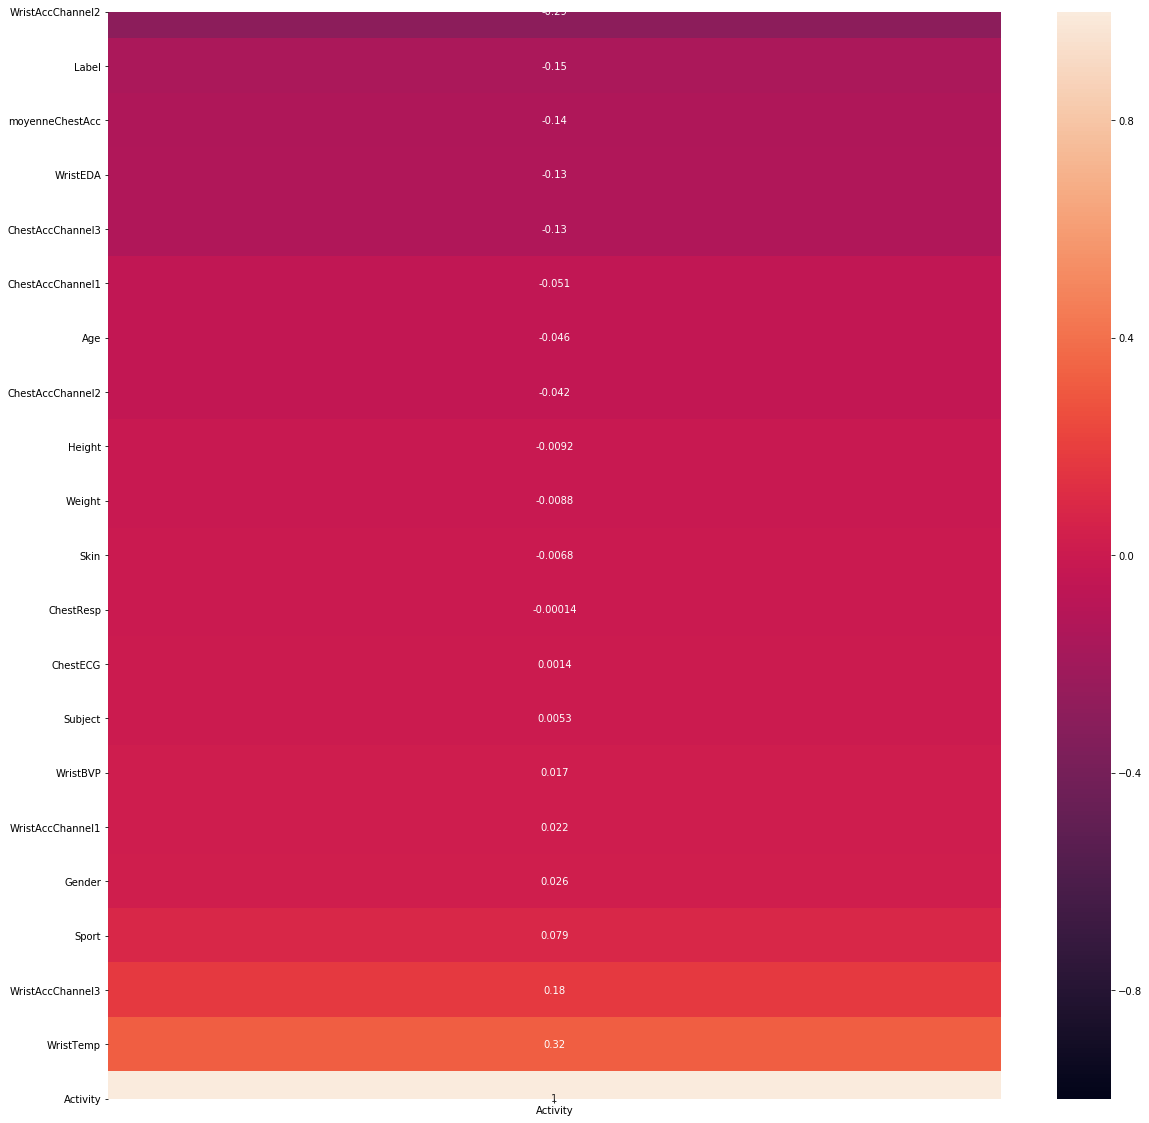

In [303]:
plt.figure(figsize=(20,20))
sn.heatmap(dataf.corr()[['Activity']].sort_values(by=['Activity'], ascending=True), vmin=-1, vmax=1,annot=True)
plt.show()

# Modele

In [321]:
# On transforme le gender pour obtenir un booléen (0/1)
dataf["Gender"].unique()
dataf['Gender'] = [(1 if x=="m" else x) for x in dataf['Gender']]
dataf['Gender'] = [(1 if x==" m" else x) for x in dataf['Gender']]
dataf['Gender'] = [(0 if x==" f" else x) for x in dataf['Gender']]
dataf["Gender"].unique()
for i in range(1, 16) :
  dataf['Subject'] = [(i if x=="S"+str(i) else x) for x in dataf['Subject']]
dataf["Subject"].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1])

## Import des librairies pour les modèles

In [276]:
##On importe toutes les libraries qui vont être nécessaire pour les différents modèles
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

## Entrainement

In [305]:
Y = dataf["Activity"]
X = dataf.drop(["Activity"], axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.25, random_state = 1)

## DECISION TREE

In [306]:
model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(xTrain, yTrain)

prediction_decision_tree = model_decision_tree.predict(xTest)
precision_tree = accuracy_score(yTest, prediction_decision_tree)
recall_tree = recall_score(yTest, prediction_decision_tree, average='macro')

print(f"Precision de la méthode Decision Tree = {precision_tree}")
print(f"Recall de la méthode Decision Tree = {recall_tree}")

Precision de la méthode Decision Tree = 0.9702423433766717
Recall de la méthode Decision Tree = 0.9673025144651464


## RANDOM FOREST

In [307]:
model_random_forest = RandomForestClassifier()
model_random_forest.fit(xTrain, yTrain)

prediction_forest = model_random_forest.predict(xTest)
precision_forest = accuracy_score(yTest, prediction_forest)
recall_forest = recall_score(yTest, prediction_forest, average='macro')

print(f"Precision de la methode random forest : {precision_forest}")
print(f"Recall de la methode random forest : {recall_forest}")

/Users/dani/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision de la methode random forest : 0.9795202780277407
Recall de la methode random forest : 0.9735578450403923


## NAIVE BAYES

In [308]:
clf = GaussianNB()
clf.fit(xTrain, yTrain)

prediction_naive = clf.predict(xTest)
precision_naive = accuracy_score(prediction_naive, yTest) 
recall_naive = recall_score(yTest, prediction_naive, average='macro')

print(f"Precision de la methode naive : {precision_naive}")
print(f"Recall de la methode naive : {recall_naive}")

Precision de la methode naive : 0.5642318552766314
Recall de la methode naive : 0.5739360730512705


## Comparaison des modèles

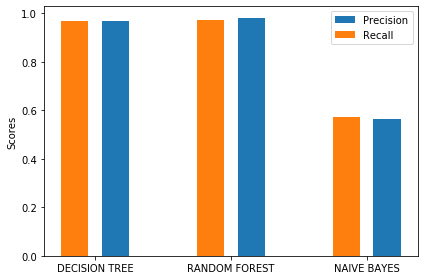

In [320]:
nom_modeles = ['DECISION TREE', 'RANDOM FOREST', 'NAIVE BAYES']
precision_tab = [precision_tree, precision_forest, precision_naive]
recall_tab = [recall_tree, recall_forest, recall_naive]

i = np.arange(len(nom_modeles))
graph, axe = plt.subplots()
precision_ax = axe.bar(i + 0.15, precision_tab, 0.2, label='Precision')
recall_ax = axe.bar(i - 0.15, recall_tab, 0.2, label='Recall')
axe.set_ylabel('Scores')
axe.set_xticks(i)
axe.set_xticklabels(labels)
axe.legend()

graph.tight_layout()
plt.show()

### On constate donc que le modèle Radom Forest présente la plus grande précision, 98%, suivi de près par le modèle Decision Tree, 97%, avec en dernier le modèle Naive Bayes seulement à 57%.